# SVM  (Classification)
 - 데이터의 분포의 가정이 힘들어 다른 모델들을 이용하기 힘들 때 사용.
 - 분류문제 회귀 문제 두가지 모두 사용 할 수 있지만 보통 SVM은 분류를 나타내고, SVR이 회귀를 나타낸다.
 - SVM의 아이디어는 아래 그림처럼 분할 초평면을 찾아 분류하는 모델이다.
 - 이때 분할 초평면은 $ W^T x + b = 0 $과 같은 선형 방정식으로 묘사 될 수 있다.
 - $W = w_1,w_2,...$이고 법선벡터를 뜻 한다.
 - $b$는 변위 항으로 초평면과 원점간의 거리를 결정한다고 한다.
 - 임의점 $x$와 초평면의 거리는 $r = \frac{\lvert W^T x + b\lvert} { \lvert w \lvert} $ 이다.
 - 이때 $f(x) = W^Tx + b$ 이 SVM의 기본모델이다.

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSUQDrZzrMyIZ7tGTpWM5ZF7sDQeYe3qhclwg&usqp=CAU" width="50%">

## 초평면을 찾는 방법
 - 분류 문제에서 가장 좋은 초평면을 찾는 방법은 Margin이 최대가 되게 하는 초평면을 찾으면 된다.
 - Margin이란, 아래의 그림처럼 초평면에서 가장 가까운 점까지의 거리라고 생각하면 된다.
 - 즉, $ \frac{2}{\lvert W \lvert} $ 가 max가 되게 하는 w를 찾으면 된다.
 - 이 뜻은 $ \lvert w \lvert^2 $이 최소가 되는 것과 같다.


<img src="https://blog.kakaocdn.net/dn/TOazX/btqEdksCokr/buBdlgHAs9EHEDYxKcKz4k/img.png" width="30%">

 - 이때 사용하는 계산을 위해 라그랑주 승수법을 사용한다.
 - $ L(W,b,\lambda) = \frac{1}{2}\lvert W \lvert^2 + \sum_{i=1}^m {\lambda_i(1 - y_i(W^Tx_i + b))}$
 - $y_i$는 위의 그림에서 파란색이면 1 초록색이면 -1이다
 - 이렇게 두면 라그랑주 승수법에 의해 $W, b$의 편미분값에 대한 $ L(W,b,\lambda) $ 을 0으로 두면 아래와 같은 식이 나온다.
 - $W = \sum_{i=1}^m{\lambda_iy_ix_i}$, $0 = \sum_{i=1}^m{\lambda_iy_i}$
 - 이 두식을 다시 $L(W,b,\lambda)$ 에 대입을 하면 
$$ \sum_{i=1}^m \lambda_i - \frac{1}{2}\sum_{i=1}^m\sum_{j=1}^m\lambda_i\lambda_jy_iy_jx_ix_j$$
$$ s.t. \sum_{i=1}^m \lambda_iy_i = 0 , \lambda_i >= 0$$
 - 와 같은 식을 얻게 되고 이것을 SMO 알고리즘에 넣고 위의 식을 최소화 하는 $\lambda와 W$를 구한다
 
 
 - 위의 과정들은  KKT 조건을 만족한다고 가정을 한다.
$$ \lambda_i >= 0$$
$$ y_if(x_i) -1 >=0 $$
$$ \lambda_i(y_if(x_i) -1) = 0 $$
 - 두번째 조건은 $x_i$들이 margin밖이나 위에 있다는 가정이고
 - 세번째 조건은 lambda는 margin위에 위치할때만 0이 아닌 값을 가질수 있다는 뜻이다.(이것을 서포트 벡터라고 부름)
 
 - b를 구하는 방법은 
   - 모든 서포트 벡터($x_s,y_s$)에 대하여 $y_sf(x_s) = 0$이 존재 한다고 한다.
   - 따라서 $ y_s(\sum_{i\in S}\lambda_iy_ix_i^Tx_s + b) = 1$이 성립한다.
   - 위의 식으로 b를 구할수 있다.

## Soft Margin (Error 허용)
  - 위의 내용은 train sample이 선형 분리가 완벽히 가능 하다는 가정하에 한 것이다
  - 하지만 현실에서는 그것이 거의 불가능 하다.
  - 이러한 문제를 완화해 주기 위해 약간의 오류를 허용해 soft margin을 잡아야 된다.
  
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRwSTgJYAlbxcZLi8e-LJYjruBaSN_F0AcW3w&usqp=CAU' width = '50%'>

### soft Margin 초평면 찾는 방법
 - 위의 에러를 허용하지 않는 초평면을 찾는 방법과 크게 다르지 않다.
 - $ L(W,b,\lambda)$의 식을 다음과 같이 바꾸어 찾으면 된다.
 $$  L(W,b,\lambda,\xi,\mu) = \frac{1}{2}\lvert W \lvert^2 + C\sum_{i=1}^m \xi_i + \sum_{i=1}^m {\lambda_i(1 - \xi_i- y_i(W^Tx_i + b))}$$
 - 이때 $\lambda_i,\mu_i > 0 $이고, 라그랑주 승수이다.
 - C가 커질수록 에러를 많이 허용하지 않는 것을 의미
 - 위의 식의 $W, b, \xi$에 대해 편도함수를 0으로 두고 풀면 된다.
 - 다음의 과정은 위의 에러를 허용하지 않은 것과 동일 하다.

## SVM 장점
 - 오류 데이터에 대한 영향이 거의 없다.(허용하기 때문)
 - 신경망 모델에 비해 overfitting의 잘 되지 않는다
 - 신경망보다 쓰기 편하다.

## SVM 단점
 - 여러번의 테스트가 필요 (최적의 margin을 찾기위해)
 - 학습속도가 느림
 - 해석이 어렵고 복잡하다.

# SVM params
   - C (정규화 매개변수) : 정규화의 강도는 C의 반비례한다. (default = '1.0')
   - kneral : { 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'}, (default = 'rbf'(kneral SVM에 설명함))
   - degree : kneral - poly 일때 차수 (default = 3)  
   - gamma : { 'scale', 'auto'} or float, (default = 'scale') 'rbf', 'poly'및 'sigmoid'에 대한 커널 계수.
   - coef0 : float, (default = 0.0) poly와 'sigmoid'에서만 의미가 있습니다.
   - shrinking : 축소 휴리스틱을 사용 할 지 여부 bool (default = True)
   - tol : 스탑 옵션 (default = 1e-3)
   - max_iter 
   - class_weight : (클래스 i의 매개 변수 C를 SVC의 경우 class_weight [i] * C로 설정합니다) dict or balance (default = None)

# 실습 
## data 
  - 다이아 이상 롤 데이터 (10분 이내)

In [5]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('high_diamond_ranked_10min.csv')

In [3]:
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


In [6]:
X_num = df[['blueWardsPlaced', 'blueWardsDestroyed', 
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 'redTowersDestroyed', 'redAvgLevel', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin']]

X_cat = df[['blueFirstBlood', 'blueDragons', 'blueHeralds', 'redDragons', 'redHeralds']]
scaler = StandardScaler()
scaler.fit(X_num)
X_scaled = scaler.transform(X_num)
X_scaled = pd.DataFrame(X_scaled, index=X_num.index, columns=X_num.columns)

X = pd.concat([X_scaled, X_cat], axis=1)
y = df['blueWins']

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_x, test_x, train_y, test_y = train_test_split(X,y, test_size = 0.3, random_state = 1)

In [16]:
model_svc = SVC(C = 2.0)

In [17]:
model_svc.fit(train_x, train_y)

SVC(C=2.0)

In [14]:
from sklearn.metrics import classification_report

In [18]:
pred = model_svc.predict(test_x)

In [19]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73      1469
           1       0.74      0.73      0.73      1495

    accuracy                           0.73      2964
   macro avg       0.73      0.73      0.73      2964
weighted avg       0.73      0.73      0.73      2964



In [20]:
X2 =  X[['blueGoldDiff','blueExperienceDiff','blueDragons','redDragons','redGoldPerMin']]
train_x, test_x, train_y, test_y = train_test_split(X2,y, test_size = 0.3, random_state = 1)
model_svc.fit(train_x, train_y)
pred = model_svc.predict(test_x)
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.74      0.75      0.74      1469
           1       0.75      0.74      0.74      1495

    accuracy                           0.74      2964
   macro avg       0.74      0.74      0.74      2964
weighted avg       0.74      0.74      0.74      2964



In [23]:
import matplotlib.pyplot as plt

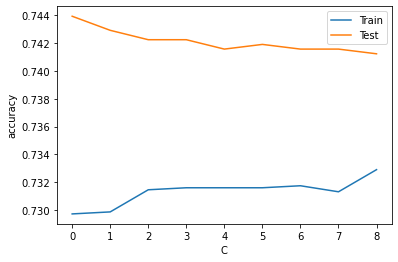

In [24]:
train_score = []
test_score = []
for _ in range(1,10):
    model_svc = SVC(C = _)
    model_svc.fit(train_x,train_y)
    train_score.append(model_svc.score(train_x,train_y))
    test_score.append(model_svc.score(test_x,test_y))
    
plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend(['Train','Test'])
plt.show()

In [26]:
print(test_score)

[0.7439271255060729, 0.742914979757085, 0.7422402159244265, 0.7422402159244265, 0.7415654520917678, 0.7419028340080972, 0.7415654520917678, 0.7415654520917678, 0.7412280701754386]


In [27]:
print(train_score)

[0.7297180043383948, 0.7298626174981924, 0.7314533622559652, 0.7315979754157629, 0.7315979754157629, 0.7315979754157629, 0.7317425885755604, 0.7313087490961677, 0.7328994938539407]
